In [1]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

import fnmatch
import os
import pandas as pd
import geopandas as gpd

from datacube_stats.statistics import GeoMedian
from datacube.helpers import ga_pq_fuser
from datacube.storage import masking
from datacube.helpers import write_geotiff

#get the DEA version of the plotting functions
import sys
sys.path.append(os.path.abspath('/home/554/lm4502/dea-notebooks-master/10_Scripts'))
import DEAPlotting
import DEADataHandling


import datacube
dc = datacube.Datacube(app='advance-query-example')

In [2]:
# create lists for all the available datasets over ther epoch of interest

#x, y = (1385000.0, 1375000.0), (-4570000.0, -4580000.0)

query = {'x': (1385000.0, 1375000.0),
         'y': (-4570000.0, -4580000.0),
         #'time': ('2016', '2018'),
         'resolution': (50,50),
         'crs': 'EPSG:3577'}

epoch = ('2017', '2018')

scenes = dc.find_datasets(product='ls8_nbart_albers', time=epoch, **query)

pq_scenes = dc.find_datasets(product='ls8_pq_albers', time=epoch, **query)

# scenes.extend(pq_scenes) # For combining the two lists (...didn't work)


In [3]:
len(scenes)

82

In [4]:
scenes

[Dataset <id=7a9091ef-d481-40b8-815f-ddf059fb4bd0 type=ls8_nbart_albers location=file:///g/data/rs0/datacube/002/LS8_OLI_NBART/13_-46/LS8_OLI_NBART_3577_13_-46_20180619235050000000_v1533269524.nc>,
 Dataset <id=221fd530-304d-4a23-be16-963a37f71eca type=ls8_nbart_albers location=file:///g/data/rs0/datacube/002/LS8_OLI_NBART/13_-46/LS8_OLI_NBART_3577_13_-46_20180619235114000000_v1533269524.nc>,
 Dataset <id=46d5eb42-0218-4c28-b662-da72582760a9 type=ls8_nbart_albers location=file:///g/data/rs0/datacube/002/LS8_OLI_NBART/13_-46/LS8_OLI_NBART_3577_13_-46_20180227235200000000_v1520974159.nc>,
 Dataset <id=ad54837f-9df2-4974-b49b-fd060eb346f8 type=ls8_nbart_albers location=file:///g/data/rs0/datacube/002/LS8_OLI_NBART/13_-46/LS8_OLI_NBART_3577_13_-46_20180227235136000000_v1520974159.nc>,
 Dataset <id=8fa9ad41-e327-430f-866b-60a82b322e11 type=ls8_nbart_albers location=file:///g/data/rs0/datacube/002/LS8_OLI_NBART/13_-46/LS8_OLI_NBART_3577_13_-46_20180211235207000000_v1520974159.nc>,
 Dataset <

In [5]:
# Make a list of all the summer datasets
summer_ds = [] # to hold list of scenes
summer_m = [12,1,2] # summer months
custom_m = [11,12,1,2,3,4] # custom months to use - edit as needed

for scene in scenes:
    print("Date is: "+str(scene.center_time))
    if scene.center_time.month in custom_m:
        summer_ds.append(scene)
        print("This is a summer scene :)")
    else:
        print("This is not summer :(")
        
summer_pq_ds = []
for pq_scene in pq_scenes:
    print("Date is: "+str(pq_scene.center_time))
    if pq_scene.center_time.month in custom_m:
        summer_pq_ds.append(pq_scene)
        print("This is a summer scene :)")
    else:
        print("This is not summer :(")

Date is: 2016-07-15 23:51:51
This is not summer :(
Date is: 2016-07-15 23:52:15
This is not summer :(
Date is: 2016-07-31 23:52:18
This is not summer :(
Date is: 2016-07-31 23:51:54
This is not summer :(
Date is: 2016-08-16 23:51:58
This is not summer :(
Date is: 2016-08-16 23:52:22
This is not summer :(
Date is: 2016-09-01 23:52:05
This is not summer :(
Date is: 2016-09-01 23:52:29
This is not summer :(
Date is: 2016-04-10 23:51:54
This is a summer scene :)
Date is: 2016-04-10 23:51:30
This is a summer scene :)
Date is: 2016-06-29 23:52:07.500000
This is not summer :(
Date is: 2016-06-29 23:51:43.500000
This is not summer :(
Date is: 2017-01-07 23:52:05
This is a summer scene :)
Date is: 2016-12-06 23:52:36
This is a summer scene :)
Date is: 2016-12-06 23:52:12
This is a summer scene :)
Date is: 2016-05-28 23:51:56
This is not summer :(
Date is: 2016-05-28 23:51:32
This is not summer :(
Date is: 2016-02-22 23:52:11
This is a summer scene :)
Date is: 2016-02-22 23:51:47
This is a summe

In [143]:
len(summer_ds)
#summer_ds[0]

Dataset <id=3ab7493f-6105-4f0e-b99f-9b3c7a89b5a3 type=ls8_nbart_albers location=file:///g/data/rs0/datacube/002/LS8_OLI_NBART/13_-46/LS8_OLI_NBART_3577_13_-46_20160105235221500000.nc>

In [9]:
#measurements = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2']
#summer_dc = dc.load(product='ls8_nbart_albers', datasets=summer_ds, x=x, y=y, crs='EPSG:3577', group_by = 'solar_day')
summer_nbart = dc.load(product='ls8_nbart_albers', datasets=summer_ds, group_by = 'solar_day', **query)

In [10]:
summer_nbart

<xarray.Dataset>
Dimensions:          (time: 31, x: 200, y: 200)
Coordinates:
  * time             (time) datetime64[ns] 2016-01-05T23:51:57.500000 ... 2018-04-16T23:51:11
  * y                (y) float64 -4.58e+06 -4.58e+06 ... -4.57e+06 -4.57e+06
  * x                (x) float64 1.375e+06 1.375e+06 ... 1.385e+06 1.385e+06
Data variables:
    coastal_aerosol  (time, y, x) int16 518 521 621 657 581 ... 474 459 315 370
    blue             (time, y, x) int16 390 444 466 515 475 ... 467 429 270 345
    green            (time, y, x) int16 465 461 589 629 591 ... 788 713 537 529
    red              (time, y, x) int16 417 470 533 619 584 ... 810 740 503 566
    nir              (time, y, x) int16 2325 2541 2557 2124 ... 2457 2539 2237
    swir1            (time, y, x) int16 1362 1418 1560 1450 ... 2514 2048 2184
    swir2            (time, y, x) int16 687 660 867 804 ... 1645 1533 1175 1278
Attributes:
    crs:      EPSG:3577

In [146]:
# Load PQ data for same query used to load Landsat data
summer_dc_pq = dc.load(product='ls8_pq_albers', fuse_func=ga_pq_fuser, group_by='solar_day',
                       datasets=summer_pq_ds, **query)

In [147]:
summer_dc_pq

<xarray.Dataset>
Dimensions:       (time: 31, x: 400, y: 400)
Coordinates:
  * time          (time) datetime64[ns] 2016-01-05T23:51:57.500000 ... 2018-04-16T23:51:11
  * y             (y) float64 -4.57e+06 -4.57e+06 ... -4.58e+06 -4.58e+06
  * x             (x) float64 1.375e+06 1.375e+06 ... 1.385e+06 1.385e+06
Data variables:
    pixelquality  (time, y, x) int16 13311 13311 13311 ... 16383 16383 16383
Attributes:
    crs:      EPSG:3577

In [148]:
# Use PQ to create mask that is True for pixels that are not affected by clouds, cloud shadow or saturation
good_quality = masking.make_mask(summer_dc_pq.pixelquality,
                                 cloud_acca='no_cloud',
                                 cloud_fmask='no_cloud',
                                 cloud_shadow_acca='no_cloud_shadow',
                                 cloud_shadow_fmask='no_cloud_shadow',
                                 blue_saturated=False,
                                 green_saturated=False,
                                 red_saturated=False,
                                 nir_saturated=False,
                                 swir1_saturated=False,
                                 swir2_saturated=False,
                                 contiguous=True)

In [149]:
# Remove -999 nodata values prior to analysing or plotting Landsat imagery by setting all nodata values to `NaN`
summer_dc = masking.mask_invalid_data(summer_nbart)

In [150]:
# Apply the mask to preserve only the good data
summer_nbart = summer_nbart.where(good_quality) #should this be summer_dc.where(good_quality)

In [151]:
summer_nbart

<xarray.Dataset>
Dimensions:          (time: 31, x: 400, y: 400)
Coordinates:
  * time             (time) datetime64[ns] 2016-01-05T23:51:57.500000 ... 2018-04-16T23:51:11
  * y                (y) float64 -4.57e+06 -4.57e+06 ... -4.58e+06 -4.58e+06
  * x                (x) float64 1.375e+06 1.375e+06 ... 1.385e+06 1.385e+06
Data variables:
    coastal_aerosol  (time, y, x) float64 nan nan nan nan ... 204.0 197.0 199.0
    blue             (time, y, x) float64 nan nan nan nan ... 170.0 146.0 137.0
    green            (time, y, x) float64 nan nan nan nan ... 301.0 265.0 292.0
    red              (time, y, x) float64 nan nan nan nan ... 291.0 250.0 245.0
    nir              (time, y, x) float64 nan nan nan ... 1.717e+03 1.9e+03
    swir1            (time, y, x) float64 nan nan nan ... 994.0 1.005e+03
    swir2            (time, y, x) float64 nan nan nan nan ... 535.0 462.0 518.0
Attributes:
    crs:      EPSG:3577

In [152]:
# Compute geomedian composite using all timesteps
summer_gm = GeoMedian().compute(summer_nbart)

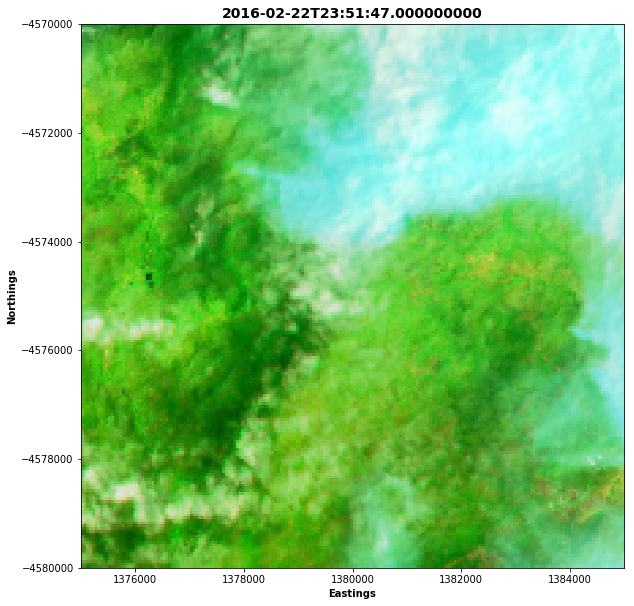

In [14]:
DEAPlotting.three_band_image(summer_nbart, bands = ['swir1', 'nir', 'green'], time = 3, contrast_enhance=True);

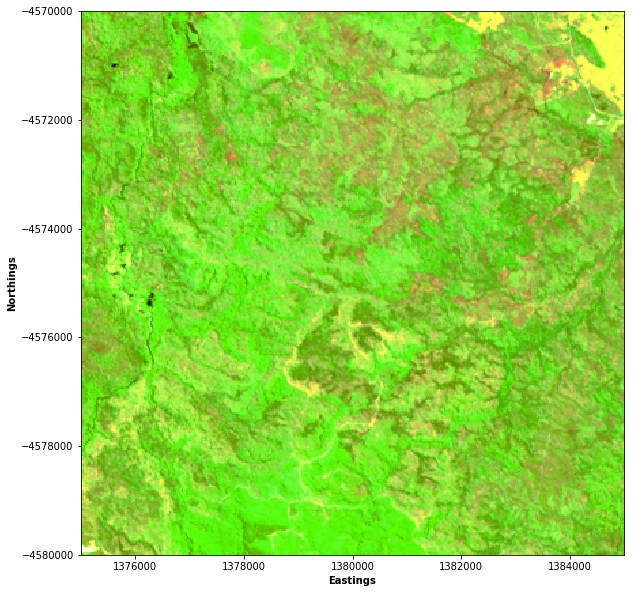

In [153]:
DEAPlotting.three_band_image(summer_gm, bands = ['swir1', 'nir', 'green'], time = 1, contrast_enhance=True);